# Linear Regression

- In research labs and when performing tests in an industrial setting, you take measurements that are associated with some level of error
- We need ways to summarize our data


## Working with Data
There are a few important concepts we need to deal with in order to correctly work with our data. These being:
- Mean
- Sum of Squares
- Standard Deviation
- Variance

### EXAMPLE
If we take a bunch of measurements of flow rate through a tube in our system:

|Q($m^3 /s$)|
|:-:|
|0.0054|
|0.0072|
|0.0051|
|0.0065|
|0.0067|
|0.0055|

<img src="Images/Example_FlowRate.png" alt="Drawing of flow rate" title="Flow Rate Example" />

In [2]:
# Run this code to set up Q and import some necessary libraries
import math
import numpy as np

q_values = [ 0.0054, 0.0072, 0.0051, 0.0065, 0.0067, 0.0055 ]

***
#### Mean
***
To summarize the data we can use the <font color=red> __Mean:__ </font>

$$ \hat{y} = \frac{ \sum \limits _{i=1} ^{n} y _i }{ n } $$

In [3]:
# Run this code to get the mean

# Get the number of values we are using (from the example it is 6)
number_of_values = len(q_values)

# Calculate the mean by getting the sum of the values, divided by the total number of values
mean = sum(q_values)/number_of_values

# Display the mean to 4 decimal places
print("The mean is: " + str(round(mean, 4)))

The mean is: 0.0061


***
#### Sum of Squares
***
We are also usually interested in the variability of spread of the measurements.

One measure is the <font color=red> __Sum of the squares__ </font> of the residuals (differences between mean and individual data points):

$$ S_t = \sum \limits _{i=1} ^{n} (y_i - \hat{y})^2 $$

In [4]:
# Run this code to get the sum of squares

# Subtract the mean from each data point
s_values = [x - mean for x in q_values]

# Get the square of each data point
s_values = [x*x for x in s_values]

# Get the sum of all the squares 
sum_of_squares = sum(s_values)

# Display the sum of squares
print("The sum of squares is: " + str(sum_of_squares))

The sum of squares is: 3.5733333333333314e-06


***
#### Standard Deviation
***
Probably the most commonly used measure of spread is the <font color=red> __Standard Deviation:__ </font>

$$ S_y = \sqrt{ \frac{ S_t }{ n-1 } } $$

In [5]:
# Run this code to get the standard deviation

# We already have St and the number of values calculated previously, so we will use those variables
# We need to use the math library to access sqrt (square root)
standard_deviation = math.sqrt(sum_of_squares/(number_of_values-1))

# Display the standard deviation
print("The standard deviation is: " + str(standard_deviation))

The standard deviation is: 0.0008453795991545255


***
#### Variance
***
Similarly, the <font color=red> __Variance__ </font> in the data is:

$$ {S_y}^2 = \frac{ S_t }{ n-1 } $$

In [6]:
# Run this code to get the variance

# All we need to do is get the square of the standard deviation
variance = standard_deviation * standard_deviation

# Display the variance
print("The variance is: " + str(variance))

The variance is: 7.146666666666663e-07


### EXAMPLE
Now, suppose we adjust the dial and take flow measurements:

|Dial Position|Q($m^3/s$)|
|:-:|:-:|
|0.5|.0015|
|1.0|.0040|
|2.0|.0055|
|2.5|.0085|
|4.0|.0131|


- We want to develop a calibration equation so we know Q for any dial setting
- We could interpolate from our measurements every time, but that would be very inefficient. Instead we can find the equation of a line that best fits the data points

<img src="Images/Example_FlowRate_Dial_Plot.png" alt="Example two Plot" title="Example Two Plot" />

$$ y = mx + b + e $$
&emsp;&emsp;$(a)$ We need the slope m<br>
&emsp;&emsp;$(b)$ and the intercept b

- One way to find the best fit line is to minimize the sum of the squares of the residuals (minimize error):

$$ e_i = y_i - mx_i - b $$ <br>
$$ S_r = \sum \limits _{i=1} ^n {e_i}^2 $$ <br>
$$ S_r = \sum \limits _{i=1} ^n (y_i - mx_i - b)^2 $$ <br>


To find m and b that minimize the Sr, take derivatives with respect to m and b, and set them to 0:

$$ \frac{ \partial S_r }{ \partial b } = -2 \sum (y_i - mx_i -b) \tag{1} $$<br>
$$ \frac{ \partial S_r }{ \partial m } = -2 \sum [x_i(y_i - mx_i -b)] \tag{2} $$ <br>

For $(1)$:<br>
$$ -2 \sum (y_i - mx_i -b) = 0 $$<br>
$$ \sum y_i - m \sum x_i - \sum b = 0 $$<br>
$$ \sum y_i - m \sum x_i - bn = 0 $$<br>


For $(2)$:<br>
$$ -2 \sum (x_i y_i - m {x_i}^2 - bx_i) = 0 $$<br>
$$ \sum x_i y_i - m \sum {x_i}^2 - b \sum x_i = 0 $$<br>


Rearranging we get the following:
$$ \sum y_i = m \sum x_i + bn $$<br>
$$ \sum x_i y_i = m \sum {x_i}^2 + b \sum x_i $$<br>

$$ 
\begin{vmatrix}
\sum y_i\\
\sum x_i y_i
\end{vmatrix}
 =  
\begin{vmatrix}
\sum x_i & n \\
\sum {x_i}^2 & \sum x_i
\end{vmatrix}
\begin{vmatrix}
m\\
b
\end{vmatrix}
$$<br>


We can now solve for m and b.

$$ \vec{y} = A \vec{m} $$ <br>
$$ \vec{m} = A \ \vec{y} $$ <br> 

$ m = 0.0032 $<br>
$ b = 0.00007 $

In [9]:
# Run this code to get the solutions to the above problem

# This is the data we are using
dial = np.array([ 0.5, 1.0, 2.0, 2.5, 4.0 ])
q_values_new = np.array([ 0.0015, 0.0040, 0.0055, 0.0085, 0.0131 ])

# Perform the square of residuals
# Get matrix y
y = np.array([ sum(q_values_new), sum(q_values_new * dial) ])

# Get matrix A
A = np.array([ [sum(dial), 5], [sum(dial*dial), sum(dial)] ])

# Get m and b
m_b = (np.linalg.inv(A) @ y).T

# Display the results
print("\nRESULTS")
print("Intercept (b):\t", m_b[1])
print("Slope (m):\t", m_b[0])

(5,)

RESULTS
Intercept (b):	 6.66666666666628e-05
Slope (m):	 0.003226666666666666


<br><br>
***
The next cell shows how to perform the same as above using built in Python libraries

In [28]:
# Here is another way we can perform linear regression in Python
from sklearn.linear_model import LinearRegression

# Reshape the array
dial = dial.reshape(-1,1)

# Display the arrays
print("Dial DATA")
print(dial)
print("Q DATA")
print(q_values_new)

# Create our linear regression model
model = LinearRegression()

# Next we fit our model using the data
model.fit(dial, q_values_new)

# Store the values
b = model.intercept_
m = model.coef_

# Get the results
print("\nRESULTS")
print("Intercept (b): ", b)
print("Slope (m): ", m)

Dial DATA
[[0.5]
 [1. ]
 [2. ]
 [2.5]
 [4. ]]
Q DATA
[0.0015 0.004  0.0055 0.0085 0.0131]

RESULTS
Intercept (b):  6.666666666666453e-05
Slope (m):  [0.00322667]


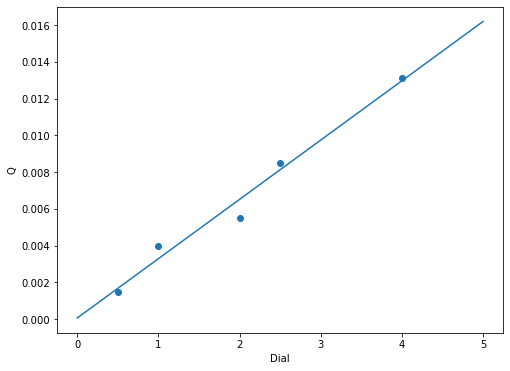

In [14]:
# We can display the results of the Linear Regression on a plot
import matplotlib.pyplot as plt

# We just need to predict y from some data
x_new = np.linspace(0, 5, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(dial, q_values_new)  # Original data to create the points
ax.plot(x_new, y_new)  # New data to create the line

ax.set_xlabel('Dial')
ax.set_ylabel('Q')

ax.axis('tight')

plt.show()

***
#### Standard Error of the Estimate
***
Now that we have the "best fit" line, how good is the fit?
$$ S_r = \sum \limits _{i=1} ^n (y_i - mx_i - b)^2 $$<br>
$$ \textrm{Recall: } S_t = \sum \limits _{i=1} ^n (y_i - \hat{y})^2 $$<br>


We can use the <font color=red> __Standard Error of the Estimate__ </font> 
$$ SEE = \sqrt{ \frac{S_r}{n-2} } $$<br> 

In [23]:
# Run this code to get the SEE

s_r = 0

# We can quickly create Sr
for i in range(len(dial)):
    s_r += (q_values_new[i] - m*dial[i] - b) **2
    
# Get the SEE
see = math.sqrt(s_r/(5-2))

# Display the results
print(see)

0.0007577745193804175


***
#### Coefficient of Determination
***
Probably the most common metric cited for goodness of fit is the <font color=red> __Coefficient of Determination__ </font> 

$$ r^2 = \frac{ S_t - S_r }{ S_t } $$<br>

This number tells you how much of the variance about the mean is described by the best-fit line.

$$ 0 \leq r^2 \leq 1 $$

Where 0 indicates no relationship between x and y, and 1 indicates a perfect fit.

In [24]:
# Run this code to get the Coefficient of Determination

# We must calculate the sum of squares again, as the previous St was calculated using different data

# Sum of Squares calculation
# Subtract the mean from each data point
s_values = [x - mean for x in q_values_new]

# Get the square of each data point
s_values = [x*x for x in s_values]

# Get the sum of all the squares 
s_t = sum(s_values)


# We already have the SEE, so we can just use that in the formula
coef_of_det = (s_t - s_r)/s_t

# Display the results
print(coef_of_det)

[0.97868925]
